In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
column_names = [ 'id', 'topic', 'sentiment', 'text']
data = pd.read_csv('/content/twitter_training.csv',names = column_names)
data.drop('id',axis = 1,inplace=True)

In [24]:
data.sentiment.value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [25]:
#remove the null values
data.dropna(inplace=True)

In [26]:
#Data Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

#Function to preprocess text
def preprocess_text(text):
    #removing the punctuation, numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '',text,re.I|re.A)

    #Convert to lowercase
    text = text.lower()
    #Tokenize the text
    tokens = text.split()

    #Remove the stop words do stemming
    tokens =  [stemmer.stem(word) for word in tokens if word not in stop_words]
    return  ' '.join(tokens)

In [17]:
data['preprocessed_text']=data['text'].apply(preprocess_text)
print(data[['text','preprocessed_text']].head())

                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

           preprocessed_text  
0   im get borderland murder  
1           come border kill  
2     im get borderland kill  
3  im come borderland murder  
4   im get borderland murder  


In [18]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(data['preprocessed_text'])
y = data['sentiment']
print(X.shape,y.shape)

(53335, 5000) (53335,)


Data Validation Decision Tree Model

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini',splitter = "random")
clf.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

0.7955752765452159


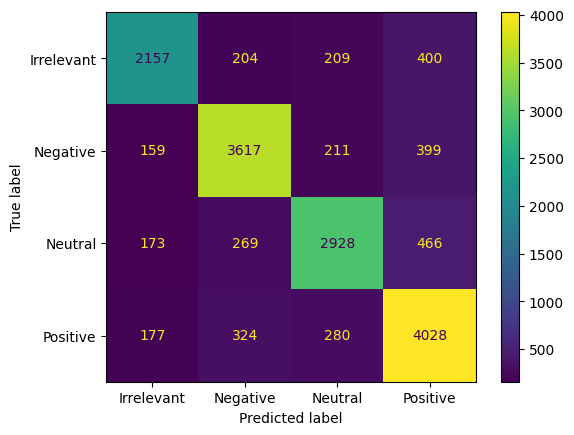

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [28]:
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)

    # Transform the preprocessed text into TF-IDF vectors
    X_new = vectorizer.transform([preprocessed_text])

    # Make predictions
    predicted_sentiment = clf.predict(X_new)

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)


In [29]:
predict_sentiment("I am feeling very happy today")

Predicted sentiment: ['Positive']


In [30]:
predict_sentiment("Its beyond me")

Predicted sentiment: ['Positive']


In [31]:
predict_sentiment("Die you son of something")

Predicted sentiment: ['Irrelevant']


In [32]:
predict_sentiment("Nvdia is a Giant Company")

Predicted sentiment: ['Negative']
